# Analyse Youtube

Nous allons analyser :
* Quel est le type de vidéo le plus fréquent?
* La distribution des vues, des likes, des commentaires et l'"engagement" est-il le même pour toutes les catégories?
* Nous avons une distribution normale aux valeurs?
* Quels sont les mots les plus fréquents dans le titre, la description, les tags?

1. Import des modules
2. Exploration initiale du jeu de données
        2.1. Import des données dans un DataFrame
        2.2. Nombre de colonnes et de lignes
        2.3. Résumé du DataFrame
        2.4. Nombre d'occurrences dans chaque colonne
        2.5. Afficher les 5 premières lignes du dataframe
        2.6. Afficher les 5 dernières lignes du dataframe
        2.7. Statistiques
3. test

## 1. Import des modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Exploration initiale du jeu de données

Objectif : découvrir et planifier le traitement préliminaire requis

Nous avons retenu un dataset au sujet de YouTube disponible sur le site Kaggle
https://www.kaggle.com/datasnaek/youtube-new/

### 2.1. Import des données dans un DataFrame

In [3]:
#us_videos = pd.read_csv("data/USvideos.csv", encoding="latin1")

In [5]:
fr_videos = pd.read_csv("../data/FRvideos.csv")

### 2.2. Nombre de colonnes et de lignes

Avec .shape
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

In [6]:
fr_videos.shape

(40724, 16)

In [11]:
fr_videos.index

RangeIndex(start=0, stop=40724, step=1)

### 2.3. Résumé du Dataframe

In [12]:
fr_videos.info

<bound method DataFrame.info of           video_id trending_date  \
0      Ro6eob0LrCY      17.14.11   
1      Yo84eqYwP98      17.14.11   
2      ceqntSXE-10      17.14.11   
3      WuTFI5qftCE      17.14.11   
4      ee6OFs8TdEg      17.14.11   
...            ...           ...   
40719  coVXf3Q9xBk      18.14.06   
40720  _umkjOQJvtw      18.14.06   
40721  nt25ec7nzIM      18.14.06   
40722  NlxE_QQMRzg      18.14.06   
40723  _LgKglfnqlc      18.14.06   

                                                   title        channel_title  \
0               Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1      LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2      DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                        PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4      QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   
...                                              

### 2.4. Nombre d'occurrences dans chaque colonne

Avec la méthode nunique
* lister les valeurs différentes de la colonne pour laquelle on a groupé les éléments
* indique le nombre d'occurrences de chaque élément

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [6]:
fr_videos.nunique()

video_id                  30581
trending_date               205
title                     30544
channel_title              6680
category_id                  18
publish_time              29234
tags                      22903
views                     36442
likes                     15618
dislikes                   3736
comment_count              5832
thumbnail_link            30572
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               25002
dtype: int64

il n'a que 30581 vidéos avec des id unique

In [7]:
type(fr_videos)

pandas.core.frame.DataFrame

### 2.5. Afficher les 5 premières lignes du dataframe

In [14]:
fr_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


### 2.6. Afficher les 5 dernières lignes du dataframe

In [15]:
fr_videos.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...
40723,_LgKglfnqlc,18.14.06,Mandoumbé ak Koor Gui 2018 Episode 28,Yesdakar,24,2018-06-13T19:45:14.000Z,"ramadan2018|""koorgui""|""Mandoumbé""",46604,947,37,127,https://i.ytimg.com/vi/_LgKglfnqlc/default.jpg,False,False,False,NaN


### 2.7. Statistiques

df.describe() = Affiche le sommaire statistique du dataframe

In [16]:
fr_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06


### Permet d’afficher les valeurs de façon unique et de les compter.

s.value_counts()

In [18]:
fr_videos.iloc[:,0].value_counts()

Rter-Np-Td0    6
55b8JEmoBTk    5
4dSKZeAIsHY    5
engRKCpYXnY    5
dq6G2YWoRqA    5
              ..
MkWGimTCnBU    1
BkVdJ90HHT4    1
PNdhDyCfcKA    1
LPBEPNmSlec    1
Qa9HgvfLFnY    1
Name: video_id, Length: 30581, dtype: int64

### corrélation

df.corr() = Renvoie une matrice de corrélation pour chaque variable entre elles. 
Plus la valeur se rapproche de 1, plus la corrélation est forte.

In [23]:
fr_videos.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.083139,-0.087377,-0.014931,-0.042850,0.038518,0.000589,-0.020990
views,-0.083139,1.000000,0.812569,0.586997,0.708161,-0.003317,-0.000780,0.000163
likes,-0.087377,0.812569,1.000000,0.450548,0.849647,-0.024617,-0.026447,-0.000397
dislikes,-0.014931,0.586997,0.450548,1.000000,0.664893,-0.007674,-0.009488,-0.000566
comment_count,-0.042850,0.708161,0.849647,0.664893,1.000000,-0.019494,-0.015685,-0.001340
comments_disabled,0.038518,-0.003317,-0.024617,-0.007674,-0.019494,1.000000,0.473975,-0.003473
ratings_disabled,0.000589,-0.000780,-0.026447,-0.009488,-0.015685,0.473975,1.000000,-0.003084
video_error_or_removed,-0.020990,0.000163,-0.000397,-0.000566,-0.001340,-0.003473,-0.003084,1.000000


les views : likes, comment et dislikes
les likes avec : les views les comment_count et les dislikes
les comment avec : les likes et les views, les dislikes

### SEABORN distplot

distplot  permet non seulement de visualiser l'histogramme d'un échantillon, mais aussi d'estimer la distribution dont l'échantillon est issu.
https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/5559011-realisez-de-beaux-graphiques-avec-seaborn

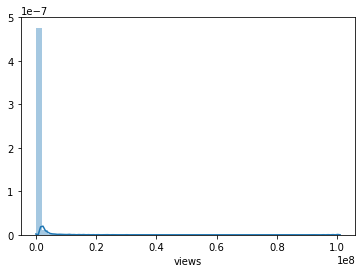

In [56]:
%matplotlib inline

sns.distplot(fr_videos['views'])

In [ ]:
sns.pairplot(fr_videos, hue='views', size=2.5);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


### les minimums

df.min() = Renvoie les valeurs minimales de chaque colonne

In [25]:
fr_videos.min()

video_id                                                     --2K8l6BWfw
trending_date                                                   17.01.12
title                      Désolé je ne vous avais pas vu !  😱 👎 ✶ DO 65
channel_title                                               #AndresSTyle
category_id                                                            1
publish_time                                    2009-03-22T19:58:05.000Z
tags                                                            #13hFoot
views                                                                223
likes                                                                  0
dislikes                                                               0
comment_count                                                          0
thumbnail_link            https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg
comments_disabled                                                  False
ratings_disabled                                   

## Traitements


### Supprime toutes les lignes qui contiennent des valeurs null

In [20]:
fr_videos.dropna(axis=1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False


In [22]:
fr_videos.shape

(40724, 16)

### Distribution normale

mise à l'échelle avec : Logarithme népérien (ou logarithme naturel)
Le logarithme népérien (ou naturel), noté ln ⁡ ( x ) {\displaystyle \ln(x)} \ln(x), qui utilise le nombre e comme base, est fondamental en analyse mathématique car il est la fonction réciproque de la fonction exponentielle ;
transforme les produits en sommes
np.log
https://fr.wikipedia.org/wiki/Logarithme_naturel

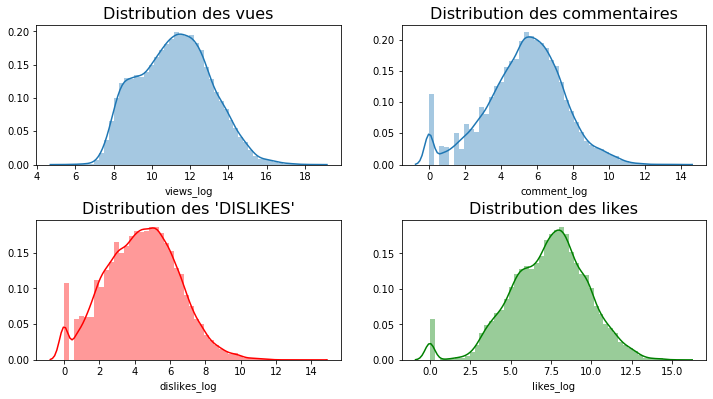

In [34]:
fr_videos['likes_log'] = np.log(fr_videos['likes'] + 1)
fr_videos['views_log'] = np.log(fr_videos['views'] + 1)
fr_videos['dislikes_log'] = np.log(fr_videos['dislikes'] + 1)
fr_videos['comment_log'] = np.log(fr_videos['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(fr_videos['views_log'])
g1.set_title("Distribution des vues", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(fr_videos['likes_log'],color='green')
g2.set_title('Distribution des likes', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(fr_videos['dislikes_log'], color='r')
g3.set_title("Distribution des 'DISLIKES'", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(fr_videos['comment_log'])
g4.set_title("Distribution des commentaires", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Les quantiles

In [31]:
print("Views quantiles")
print(fr_videos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(fr_videos['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(fr_videos['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(fr_videos['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       1968.00
0.25      16974.50
0.50      73721.00
0.75     270808.75
0.99    5542747.50
Name: views, dtype: float64

Likes quantiles
0.01         0.00
0.25       338.00
0.50      1892.50
0.75      7969.50
0.99    279285.49
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25       18.00
0.50       83.00
0.75      335.00
0.99    10648.31
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25       56.00
0.50      235.00
0.75      841.00
0.99    28076.48
Name: comment_count, dtype: float64


### Ajout des catégories

In [39]:
#fr_cat = pd.read_json("data/FR_category_id.json")

In [ ]:
cat_fr = pd.read_json("data/FR_category_id.json")

In [40]:
fr_cat_list = []
for x in range(cat_fr.shape[0]):
    d = fr_cat.iloc[x,2]["snippet"]["title"]
    fr_cat_list.append(d)
print(fr_cat_list)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [41]:
fr_videos["category"] = ""
for x in range(len(fr_cat_list)):
    filtre = fr_videos["category_id"] == x
    fr_videos["category"][filtre] = fr_cat_list[x]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
fr_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,category
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,...,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,10.284762,12.267652,7.011214,8.247482,Foreign
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,...,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,9.550662,12.977851,6.357842,7.057898,Foreign
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,...,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,11.241169,13.086019,6.169611,9.167537,Family
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,...,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",11.350607,13.737790,6.311735,8.367300,Comedy
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,...,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,8.998631,11.861439,4.290459,6.177944,Anime/Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,...,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...,5.730100,10.981200,4.465908,6.186209,Autos & Vehicles
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,...,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...,7.606885,12.486126,6.907755,7.242798,Horror
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,...,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...,8.434246,10.768717,4.127134,6.423247,Drama
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,...,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...,5.501258,11.265976,4.317488,3.850148,Autos & Vehicles


Vidéos par catégorie (nb)
Foreign            9819
Drama              5719
Comedy             5405
Family             4343
Anime/Animation    4342
Name: category, dtype: int64


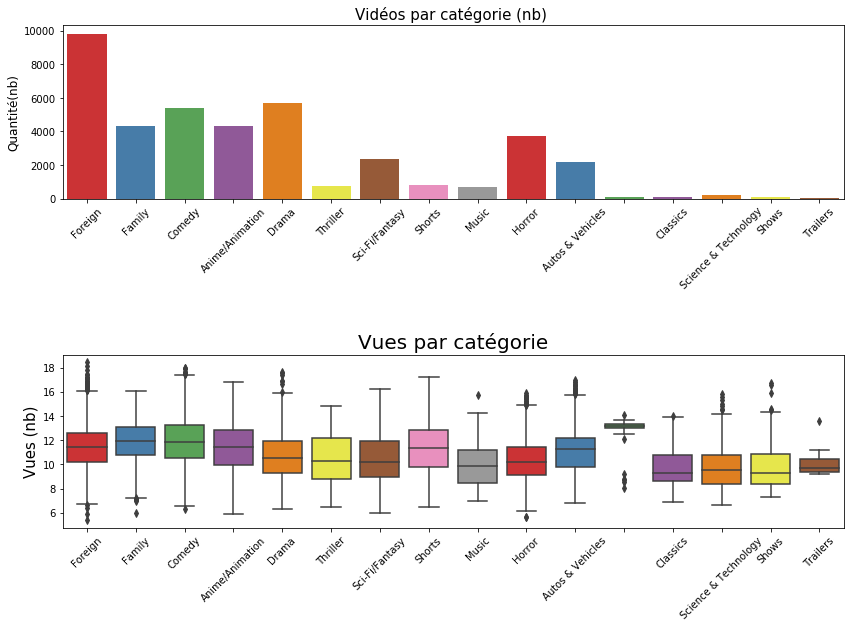

In [46]:
print("Vidéos par catégorie (nb)")
print(fr_videos.category.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category', data=fr_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Vidéos par catégorie (nb) ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Quantité(nb)", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category', y='views_log', data=fr_videos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Vues par catégorie", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Vues (nb)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

In [14]:
print(fr_videos.category.value_counts()[:5])

AttributeError: 'DataFrame' object has no attribute 'category'

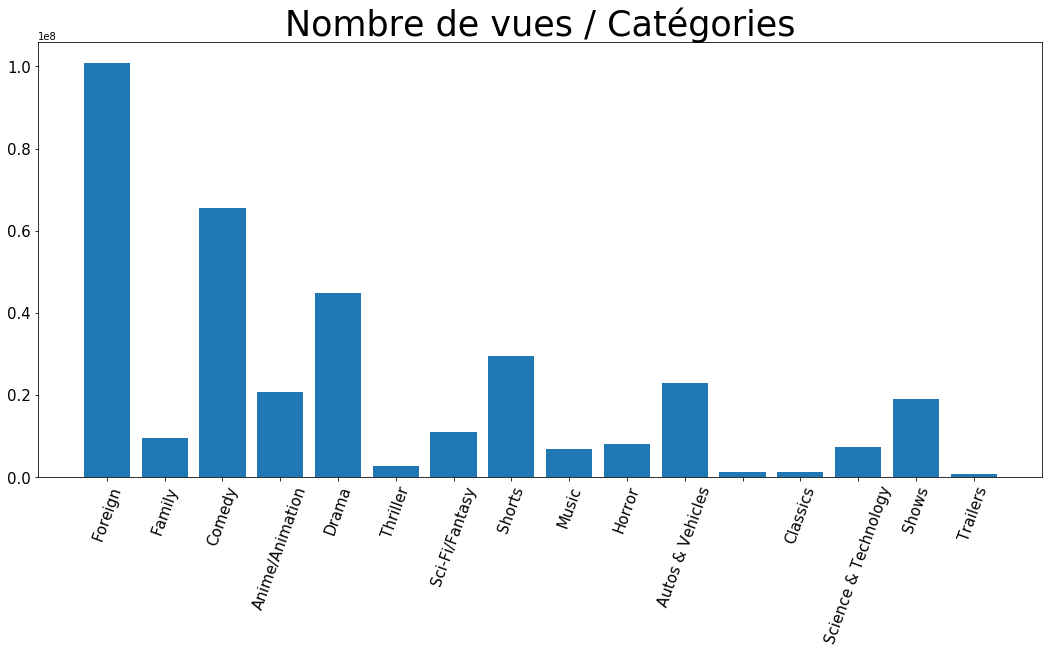

In [49]:
plt.figure(figsize=(18,8))

plt.bar(fr_videos["category"], fr_videos["views"])
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)

plt.show()

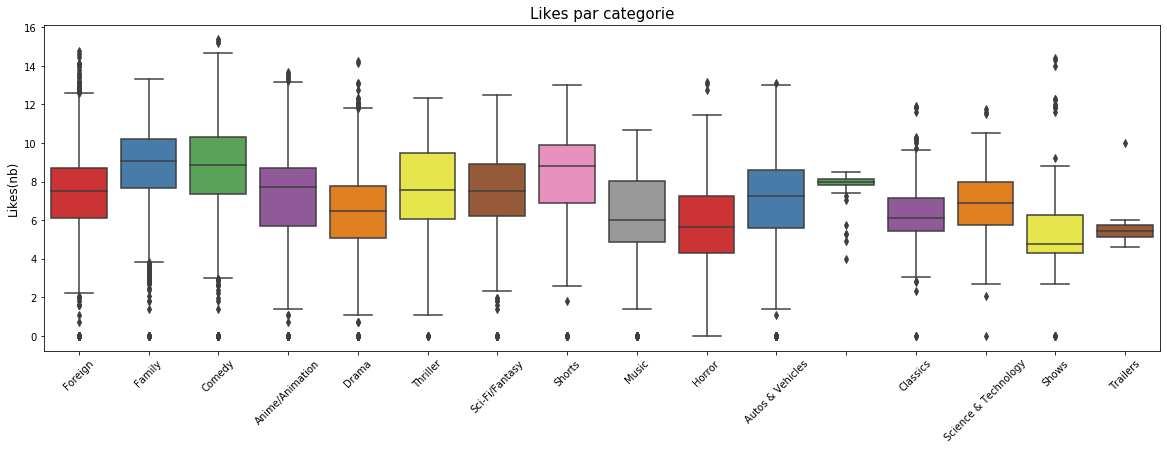

In [54]:
plt.figure(figsize = (20,6))

g = sns.boxplot(x='category', y='likes_log', data=fr_videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes par categorie", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(nb)", fontsize=12)
plt.show()

## Engagement

quelle catégorie à le meilleur engagement :
pourcentage des nombres de 
* J'aime, 
* Je n'aime pas, 
* Commentaire
par rapport aux vues pour toutes les catégories

Nous créons de nouvelles variables : 

In [7]:
fr_videos['like_rate'] =  fr_videos ['likes'] / fr_videos['views'] * 100
fr_videos['dislike_rate'] =  fr_videos ['dislikes'] / fr_videos['views'] * 100
fr_videos['comment_rate'] =  fr_videos ['comment_count'] / fr_videos['views'] * 100

In [8]:
fr_videos['comment_rate'].head

<bound method NDFrame.head of 0        1.794529
1        0.268302
2        1.986921
3        0.465078
4        0.339462
           ...   
40719    0.825420
40720    0.527889
40721    1.294464
40722    0.058886
40723    0.272509
Name: comment_rate, Length: 40724, dtype: float64>

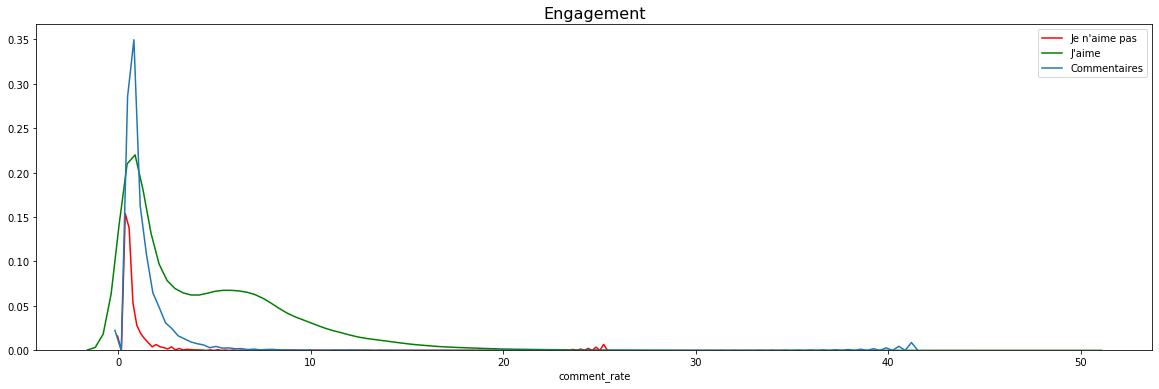

In [10]:
plt.figure(figsize = (20,6))

g1 = sns.distplot(fr_videos['dislike_rate'], color='red',hist=False, label="Je n'aime pas")
g1 = sns.distplot(fr_videos['like_rate'], color='green',hist=False, label="J'aime")
g1 = sns.distplot(fr_videos['comment_rate'],hist=False,label="Commentaires")
g1.set_title('Engagement', fontsize=16)
#plt.legend()
plt.show()



In [12]:
cat_df_fr = fr_videos['category'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Nombre de vidéos")
plt.ylabel("Catégories")
plt.title("Nombres de vidéos par catégories")

KeyError: 'category'

In [11]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

NameError: name 'df_yout' is not defined

<Figure size 1008x432 with 0 Axes>

trending date is in yy.dd.mm format

NameError: name 'comments' is not defined

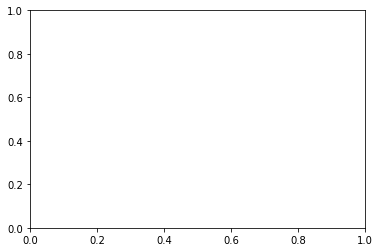

In [11]:
plt.ticklabel_format(style='plain')
sns.barplot(x='comment_count',y='title',data=comments.tail(10))

## analyse des Tags

Import des librairies nltk et wordcloud

In [1]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

ModuleNotFoundError: No module named 'wordcloud'